#Modelagem FutIA

Código escrito no Google Colab

#Bibliotecas Utilizada:

In [ ]:
! pip install --pre pycaret

In [55]:
from pycaret.utils import version
version()

'3.0.0.rc7'

In [ ]:
! pip install mlflow

In [57]:
import pandas as pd
import seaborn as sns
import numpy as np

from pycaret.classification import *

#Carregando base de dados:


In [58]:
df_dataset = pd.read_parquet('dataset_9.parquet')
df_dataset.head()

,Ano,Rodada,id,fgk_equipe,Oponente,TR0,TR1,TR2,TR3,TR4,...,OP4,OC0,OC1,OC2,OC3,OC4,OGL,Resultado,GP,GC
0,2014-2015,6,9d2c4411,17892952,b2b47a98,1,0,2,1,0,...,0,2,4,3,0,2,1,2,1,0
1,2014-2015,7,bc4351a4,17892952,8ef52968,2,1,0,2,1,...,1,0,0,2,1,1,0,0,1,3
2,2014-2015,8,6fa0779f,17892952,fb10988f,0,2,1,0,2,...,3,2,0,1,4,0,1,2,2,1
3,2014-2015,9,2be4379e,17892952,33c895d4,2,0,2,1,0,...,4,0,1,1,0,0,0,0,0,1
4,2014-2015,10,c172f461,17892952,7c21e445,0,2,0,2,1,...,3,1,1,0,2,1,1,1,2,2


In [59]:
df_dataset.columns

Index(['Ano', 'Rodada', 'id', 'fgk_equipe', 'Oponente', 'TR0', 'TR1', 'TR2',
       'TR3', 'TR4', 'TL0', 'TL1', 'TL2', 'TL3', 'TL4', 'TP0', 'TP1', 'TP2',
       'TP3', 'TP4', 'TC0', 'TC1', 'TC2', 'TC3', 'TC4', 'TGL', 'OR0', 'OR1',
       'OR2', 'OR3', 'OR4', 'OL0', 'OL1', 'OL2', 'OL3', 'OL4', 'OP0', 'OP1',
       'OP2', 'OP3', 'OP4', 'OC0', 'OC1', 'OC2', 'OC3', 'OC4', 'OGL',
       'Resultado', 'GP', 'GC'],
      dtype='object')

#Tratamento de dados

##Criação das médias móveis:

In [60]:
df_train = df_dataset[['Ano', 'Rodada', 'id', 'fgk_equipe', 'Oponente', 'Resultado', 'GP', 'GC', 'TGL', 'OGL']]

In [61]:
df_train['TR_mean'] = df_dataset[['TR0', 'TR1', 'TR2', 'TR3', 'TR4']].mean(axis=1)
df_train['TL_mean'] = df_dataset[['TL0', 'TL1', 'TL2', 'TL3', 'TL4']].mean(axis=1)
df_train['TP_mean'] = df_dataset[['TP0', 'TP1', 'TP2', 'TP3', 'TP4']].mean(axis=1)
df_train['TC_mean'] = df_dataset[['TC0', 'TC1', 'TC2', 'TC3', 'TC4']].mean(axis=1)
df_train['OR_mean'] = df_dataset[['OR0', 'OR1', 'OR2', 'OR3', 'OR4']].mean(axis=1)
df_train['OL_mean'] = df_dataset[['OL0', 'OL1', 'OL2', 'OL3', 'OL4']].mean(axis=1)
df_train['OP_mean'] = df_dataset[['OP0', 'OP1', 'OP2', 'OP3', 'OP4']].mean(axis=1)
df_train['OC_mean'] = df_dataset[['OC0', 'OC1', 'OC2', 'OC3', 'OC4']].mean(axis=1)

In [62]:
df_train.head()

,Ano,Rodada,id,fgk_equipe,Oponente,Resultado,GP,GC,TGL,OGL,TR_mean,TL_mean,TP_mean,TC_mean,OR_mean,OL_mean,OP_mean,OC_mean
0,2014-2015,6,9d2c4411,17892952,b2b47a98,2,1,0,1,1,0.8,0.4,0.8,1.0,0.6,0.6,1.0,2.2
1,2014-2015,7,bc4351a4,17892952,8ef52968,0,1,3,0,0,1.2,0.4,1.0,0.8,0.8,0.6,0.6,0.8
2,2014-2015,8,6fa0779f,17892952,fb10988f,2,2,1,1,1,1.0,0.4,1.0,1.2,0.8,0.6,1.4,1.4
3,2014-2015,9,2be4379e,17892952,33c895d4,0,0,1,0,0,1.0,0.6,1.2,1.4,1.6,0.6,3.0,0.4
4,2014-2015,10,c172f461,17892952,7c21e445,1,2,2,1,1,1.0,0.4,1.2,1.4,1.6,0.6,2.2,1.0


##Criando coluna de resultado como empate e não empate:

Primeiro vou alterar a coluna resultados:

Antes: </br>
0 - Derrota </br>
1 - Empate </br>
2 - Vitória 

Depois: </br>
0 - Empate </br>
1 - Derrota </br>
2 - Vitória 

In [63]:
df_train['Resultado'].replace(to_replace=0, value=3, inplace=True)
df_train['Resultado'].replace(to_replace=1, value=0, inplace=True)
df_train['Resultado'].replace(to_replace=3, value=1, inplace=True)

Aqui vamos deixar: </br>
0 - Empate </br>
1 - Não Empate

In [64]:
df_train['Resultado'].value_counts()

2    2091
1    2091
0    1264
Name: Resultado, dtype: int64

In [65]:
df_train['Resultado_Empate'] = df_train['Resultado']
df_train['Resultado_Empate'].replace(to_replace=2, value=1, inplace=True)

In [66]:
df_train['Resultado_Empate'].value_counts()

1    4182
0    1264
Name: Resultado_Empate, dtype: int64

In [67]:
df_train.columns

Index(['Ano', 'Rodada', 'id', 'fgk_equipe', 'Oponente', 'Resultado', 'GP',
       'GC', 'TGL', 'OGL', 'TR_mean', 'TL_mean', 'TP_mean', 'TC_mean',
       'OR_mean', 'OL_mean', 'OP_mean', 'OC_mean', 'Resultado_Empate'],
      dtype='object')

#Modelagem:

##Selecionando as variáveis que desejamos:

In [68]:
df_train_cut = df_train[['TR_mean', 'TL_mean', 'TP_mean',
                         'TC_mean', 'OR_mean', 'OL_mean',
                         'OP_mean', 'OC_mean', 'TGL',
                         'OGL', 'Resultado_Empate']]

In [69]:
df_train_cut.head()

,TR_mean,TL_mean,TP_mean,TC_mean,OR_mean,OL_mean,OP_mean,OC_mean,TGL,OGL,Resultado_Empate
0,0.8,0.4,0.8,1.0,0.6,0.6,1.0,2.2,1,1,1
1,1.2,0.4,1.0,0.8,0.8,0.6,0.6,0.8,0,0,1
2,1.0,0.4,1.0,1.2,0.8,0.6,1.4,1.4,1,1,1
3,1.0,0.6,1.2,1.4,1.6,0.6,3.0,0.4,0,0,1
4,1.0,0.4,1.2,1.4,1.6,0.6,2.2,1.0,1,1,0


##Escolha do modelo:

In [70]:
exp_clf1 = setup(data = df_train_cut, 
                 target = 'Resultado_Empate', 
                 polynomial_features = True,
                 normalize = True,
                 fix_imbalance = True) 

,Description,Value
0,Session id,2587
1,Target,Resultado_Empate
2,Target type,Binary
3,Original data shape,"(5446, 11)"
4,Transformed data shape,"(7488, 66)"
5,Transformed train set shape,"(5854, 66)"
6,Transformed test set shape,"(1634, 66)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


In [72]:
%%time

best_model = compare_models(fold=5, sort='Prec.')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.5063,0.5108,0.4954,0.7819,0.6062,0.0263,0.0320,1.5500
lda,Linear Discriminant Analysis,0.5042,0.5073,0.4930,0.7808,0.6042,0.0237,0.0290,0.1440
ridge,Ridge Classifier,0.5031,0.0000,0.4913,0.7806,0.6028,0.0233,0.0285,0.0840
ada,Ada Boost Classifier,0.6768,0.5383,0.8073,0.7796,0.7924,0.0558,0.0569,0.8640
knn,K Neighbors Classifier,0.5530,0.5168,0.5859,0.7768,0.6679,0.0238,0.0258,0.4760
dt,Decision Tree Classifier,0.6382,0.5152,0.7448,0.7755,0.7597,0.0283,0.0287,0.2460
svm,SVM - Linear Kernel,0.5034,0.0000,0.4971,0.7752,0.6056,0.0154,0.0180,0.2000
lightgbm,Light Gradient Boosting Machine,0.7345,0.5326,0.9279,0.7723,0.8429,0.0296,0.0358,1.1280
et,Extra Trees Classifier,0.7201,0.5236,0.9016,0.7721,0.8318,0.0266,0.0299,0.8860
rf,Random Forest Classifier,0.7172,0.5219,0.9030,0.7690,0.8305,0.0071,0.0079,1.3900


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

CPU times: user 7.68 s, sys: 808 ms, total: 8.48 s
Wall time: 1min


In [76]:
model_ve_gbc = create_model('gbc', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7392,0.5102,0.9420,0.7699,0.8473,0.0132,0.0173
1,0.7523,0.4799,0.9608,0.7723,0.8563,0.0319,0.0468
2,0.7454,0.5866,0.9607,0.7667,0.8528,-0.0076,-0.0120
3,0.7349,0.5277,0.9487,0.7634,0.8460,-0.0320,-0.0465
4,0.7533,0.5323,0.9709,0.7686,0.8580,0.0069,0.0119
Mean,0.7450,0.5274,0.9566,0.7682,0.8521,0.0025,0.0035
Std,0.0072,0.0349,0.0102,0.0030,0.0048,0.0214,0.0312


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

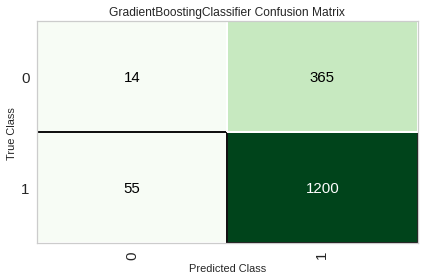

In [77]:
plot_model(model_ve_gbc, plot = 'confusion_matrix')

In [79]:
model_ve_ada = create_model('ada', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6239,0.5222,0.7099,0.7805,0.7435,0.0443,0.0450
1,0.6763,0.5158,0.8208,0.7721,0.7957,0.0200,0.0202
2,0.6942,0.5776,0.8393,0.7794,0.8082,0.0593,0.0603
3,0.6693,0.5136,0.8034,0.7743,0.7886,0.0307,0.0309
4,0.7205,0.5622,0.8632,0.7915,0.8258,0.1249,0.1279
Mean,0.6768,0.5383,0.8073,0.7796,0.7924,0.0558,0.0569
Std,0.0318,0.0264,0.0526,0.0068,0.0275,0.0369,0.0380


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

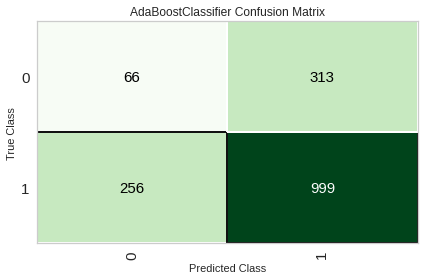

In [80]:
plot_model(model_ve_ada, plot = 'confusion_matrix')

#Hipótese 1

E se tirarmos os jogos com derrota e trabalharmos apenas vitória ou empate, já que os dados de vitória e derrota são espelhados (assim como são os de empate).

In [81]:
df_train_v_e = df_train.drop(df_train[df_train.Resultado == 1].index)

In [82]:
df_train_v_e.Resultado.value_counts()

2    2091
0    1264
Name: Resultado, dtype: int64

In [84]:
df_train_v_e['Resultado_Empate'] = df_train_v_e['Resultado']
df_train_v_e['Resultado_Empate'].replace(to_replace=2, value=1, inplace=True)

In [85]:
df_train_v_e_cut = df_train_v_e[['TR_mean', 'TL_mean', 'TP_mean',
                         'TC_mean', 'OR_mean', 'OL_mean',
                         'OP_mean', 'OC_mean', 'TGL',
                         'OGL', 'Resultado_Empate']]

In [86]:
exp_clf2 = setup(data = df_train_v_e_cut, 
                 target = 'Resultado_Empate', 
                 polynomial_features = True,
                 normalize = True,
                 fix_imbalance = True) 

,Description,Value
0,Session id,2281
1,Target,Resultado_Empate
2,Target type,Binary
3,Original data shape,"(3355, 11)"
4,Transformed data shape,"(3933, 66)"
5,Transformed train set shape,"(2926, 66)"
6,Transformed test set shape,"(1007, 66)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


In [87]:
%%time

best_model = compare_models(fold=5, sort='Prec.')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.5720,0.6039,0.5714,0.6888,0.6245,0.1366,0.1400,0.0980
lr,Logistic Regression,0.5758,0.5944,0.5858,0.6879,0.6323,0.1382,0.1411,1.0060
ridge,Ridge Classifier,0.5724,0.0000,0.5837,0.6842,0.6295,0.1310,0.1337,0.0840
lda,Linear Discriminant Analysis,0.5741,0.5918,0.5892,0.6842,0.6325,0.1322,0.1348,0.1140
ada,Ada Boost Classifier,0.5758,0.5776,0.6589,0.6599,0.6593,0.0973,0.0973,0.4760
rf,Random Forest Classifier,0.5933,0.5751,0.7279,0.6568,0.6904,0.1020,0.1032,1.0320
gbc,Gradient Boosting Classifier,0.5911,0.5859,0.7259,0.6553,0.6886,0.0976,0.0987,1.6620
et,Extra Trees Classifier,0.5835,0.5694,0.7163,0.6503,0.6814,0.0833,0.0846,0.5560
lightgbm,Light Gradient Boosting Machine,0.5818,0.5633,0.7122,0.6503,0.6794,0.0806,0.0815,0.7880
knn,K Neighbors Classifier,0.5358,0.5321,0.5550,0.6488,0.5978,0.0566,0.0575,0.6160


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

CPU times: user 7.35 s, sys: 195 ms, total: 7.55 s
Wall time: 42.2 s


In [93]:
model_ve_rf = create_model('rf', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5426,0.5321,0.6587,0.6266,0.6423,0.0091,0.0092
1,0.5596,0.5141,0.6928,0.6344,0.6623,0.0328,0.0331
2,0.4936,0.4539,0.5700,0.5986,0.5839,-0.0618,-0.0620
3,0.5437,0.5246,0.6610,0.6266,0.6433,0.0114,0.0115
4,0.5309,0.5180,0.6610,0.6146,0.6370,-0.0232,-0.0233
Mean,0.5341,0.5085,0.6487,0.6202,0.6338,-0.0063,-0.0063
Std,0.0222,0.0280,0.0413,0.0125,0.0264,0.0330,0.0331


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

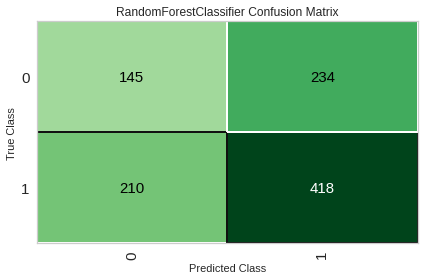

In [94]:
plot_model(model_ve_rf, plot = 'confusion_matrix')

#Hipótese 2

E se tirarmos as informações do oponente?

In [95]:
df_train_v_e_cut2 = df_train_v_e[['TR_mean', 'TL_mean', 'TP_mean',
                         'TC_mean', 'TGL', 'Resultado_Empate']]

In [96]:
exp_clf3 = setup(data = df_train_v_e_cut2, 
                 target = 'Resultado_Empate', 
                 polynomial_features = True,
                 normalize = True,
                 fix_imbalance = True) 

,Description,Value
0,Session id,2952
1,Target,Resultado_Empate
2,Target type,Binary
3,Original data shape,"(3355, 6)"
4,Transformed data shape,"(3933, 21)"
5,Transformed train set shape,"(2926, 21)"
6,Transformed test set shape,"(1007, 21)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


In [97]:
%%time

best_model = compare_models(fold=5, sort='Prec.')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.5179,0.5740,0.4340,0.6762,0.5283,0.0811,0.0896,0.0680
lr,Logistic Regression,0.5592,0.5760,0.5748,0.6705,0.6182,0.1035,0.1053,0.3920
ridge,Ridge Classifier,0.5549,0.0000,0.5734,0.6658,0.6152,0.0937,0.0953,0.0620
lda,Linear Discriminant Analysis,0.5515,0.5731,0.5707,0.6623,0.6119,0.0869,0.0882,0.0740
gbc,Gradient Boosting Classifier,0.5669,0.5544,0.6630,0.6494,0.6557,0.0713,0.0715,0.5080
svm,SVM - Linear Kernel,0.5630,0.0000,0.6760,0.6443,0.6576,0.0512,0.0514,0.0720
ada,Ada Boost Classifier,0.5302,0.5394,0.5645,0.6391,0.5988,0.0368,0.0373,0.2580
lightgbm,Light Gradient Boosting Machine,0.5571,0.5218,0.6671,0.6384,0.6524,0.0429,0.0430,0.2160
rf,Random Forest Classifier,0.5477,0.5039,0.6617,0.6308,0.6458,0.0212,0.0212,0.5340
et,Extra Trees Classifier,0.5324,0.5012,0.6070,0.6294,0.6180,0.0158,0.0158,0.4520


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

CPU times: user 6.79 s, sys: 167 ms, total: 6.96 s
Wall time: 21.6 s


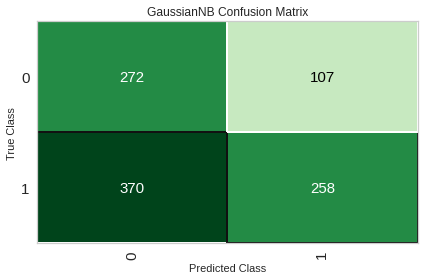

In [98]:
plot_model(best_model, plot = 'confusion_matrix')

#Modelo Vitória ou Derrota

Removendo os dados de empate do Dataframe:

Criando coluna que informa vitória (2) e derrota (1)

In [45]:
df_train_v_d = df_train_v_e.drop(df_train_v_e[df_train_v_e['Resultado']==0].index)

In [46]:
df_train_v_d['Resultado'].value_counts()

2    2091
1    2091
Name: Resultado, dtype: int64

In [47]:
df_train_v_d['Resultado_Vitoria'] = df_train_v_d['Resultado']-1

In [48]:
df_train_v_d['Resultado_Vitoria'].value_counts()

1    2091
0    2091
Name: Resultado_Vitoria, dtype: int64

In [49]:
df_train_v_d.columns

Index(['Ano', 'Rodada', 'id', 'fgk_equipe', 'Oponente', 'Resultado', 'GP',
       'GC', 'TGL', 'OGL', 'TR_mean', 'TL_mean', 'TP_mean', 'TC_mean',
       'OR_mean', 'OL_mean', 'OP_mean', 'OC_mean', 'Resultado_Empate',
       'Resultado_Vitoria'],
      dtype='object')

In [50]:
df_train_v_d_cut = df_train_v_d[['TR_mean', 'TL_mean', 'TP_mean',
                                 'TC_mean', 'OR_mean', 'OL_mean',
                                 'OP_mean', 'OC_mean', 'TGL',
                                 'OGL', 'Resultado_Vitoria']]

In [51]:
exp_clf4 = setup(data = df_train_v_d_cut, 
                 target = 'Resultado_Vitoria', 
                 polynomial_features = True,
                 normalize = True,
                 fix_imbalance = True) 

,Description,Value
0,Session id,1334
1,Target,Resultado_Vitoria
2,Target type,Binary
3,Original data shape,"(4182, 11)"
4,Transformed data shape,"(4183, 66)"
5,Transformed train set shape,"(2928, 66)"
6,Transformed test set shape,"(1255, 66)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


In [52]:
%%time

best_model = compare_models(fold=10, sort='Prec.')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.6594,0.7177,0.6316,0.6689,0.6494,0.3188,0.3195,0.0740
gbc,Gradient Boosting Classifier,0.6556,0.7086,0.6610,0.6539,0.6573,0.3113,0.3114,1.1760
lr,Logistic Regression,0.6505,0.7137,0.6487,0.6517,0.6498,0.3010,0.3014,0.9190
ridge,Ridge Classifier,0.6481,0.0000,0.6480,0.6486,0.6480,0.2963,0.2965,0.0630
lda,Linear Discriminant Analysis,0.6478,0.7101,0.6473,0.6481,0.6475,0.2956,0.2958,0.0980
ada,Ada Boost Classifier,0.6447,0.6956,0.6460,0.6440,0.6446,0.2894,0.2898,0.3590
lightgbm,Light Gradient Boosting Machine,0.6337,0.6796,0.6254,0.6363,0.6305,0.2675,0.2678,0.3100
rf,Random Forest Classifier,0.6307,0.6784,0.6268,0.6318,0.6290,0.2614,0.2616,0.7720
et,Extra Trees Classifier,0.6228,0.6642,0.6103,0.6262,0.6174,0.2456,0.2462,0.5040
knn,K Neighbors Classifier,0.6006,0.6319,0.6029,0.6006,0.6013,0.2013,0.2016,0.2150


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

CPU times: user 5.6 s, sys: 217 ms, total: 5.81 s
Wall time: 53 s


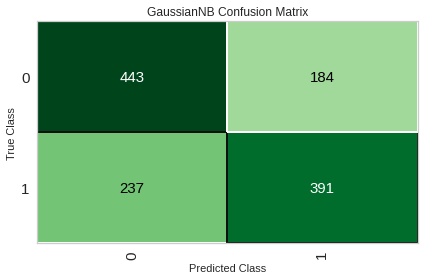

In [53]:
plot_model(best_model, plot = 'confusion_matrix')

#Tentativa de compilação do resultado dos dois modelos:

Escolher os modelos, rodar e comparar os resultados com a coluna de Resultados original.